# Model Calibration

## Imports and Setup

In [1]:
import os 
os.chdir('/home/itingzon.unicef/giga')
from utils import config_utils
from utils import calib_utils
from utils import post_utils

import pandas as pd
import numpy as np
import geopandas as gpd

pd.set_option('mode.chained_assignment', None)
%load_ext autoreload
%autoreload 2

## Load Configuration

In [418]:
iso_code = "GHA"
config_file = "configs/cnn_configs/satlas-aerial_swinb_mi_01.yaml"
config = config_utils.load_config(os.path.join(os.getcwd(), config_file))
config["iso_codes"] = [iso_code]

## Model Calibration

In [419]:
results = calib_utils.compare_calibrators(iso_code, config, n_bins=10)
pd.DataFrame(results).T.apply(lambda x: round(x, 5))

,val_ace,val_ece,val_mce,val_nll,val_briers,test_ace,test_ece,test_mce,test_nll,test_briers
Uncalibrated,0.12457,0.20843,0.23074,0.38395,0.10508,0.14442,0.21177,0.25270,0.38012,0.10330
IsotonicRegression,0.00000,0.00000,0.00000,0.20049,0.05527,0.07804,0.00860,0.25733,0.26699,0.05411
TemperatureScaling,0.23592,0.03621,0.51319,0.24296,0.06398,0.14254,0.03171,0.40358,0.23374,0.06067
HistogramBinning,0.00000,0.00000,0.00000,0.23010,0.06032,0.02900,0.00251,0.10294,0.22311,0.05771
LogisticCalibration,0.18111,0.02321,0.37560,0.23673,0.06284,0.12928,0.02737,0.43473,0.22679,0.05943
BetaCalibration,0.18711,0.02313,0.37840,0.23674,0.06286,0.13197,0.02742,0.38631,0.22683,0.05945
BBQ,0.00002,0.00001,0.00005,0.21796,0.05767,0.05567,0.00903,0.16116,0.20829,0.05542
ENIR,0.00529,0.00718,0.02064,0.40447,0.05410,0.07576,0.01556,0.30000,0.54349,0.05888


## Load Model Calibrator

In [428]:
calibrator_name = "BBQ"
calibrator = calib_utils.load_calibrator(iso_code, config, calibrator_name)
calibrator

BBQ(_binning_models=[HistogramBinning(_bin_bounds=[array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])],
                                      _bin_map=array([0.04545455, 0.13636364, 0.03181818, 0.26086957, 0.47368421,
       0.28571429, 0.38888889, 0.58181818, 0.92544571, 0.86363636,
       0.95454545]),
                                      _bins_internal=[11],
                                      _default_indep...
                                      _bin_map=array([0.08333333, 0.04202899, 0.37142857, 0.41176471, 0.90196078,
       0.91666667]),
                                      _bins_internal=[6],
                                      _default_independent_probabilities=False,
                                      _multiclass_instances=[],
                                      _num_combination=0, bins=6,
                                      num_classes=2)],
    _default_independent_probabilities=False,
    _model_scores=array([9.99761927e-01, 2.07675017e-04, 3.03954301e-05, 2.26960025e-09]),
    _multiclass_instances=[], num_classes=2, score_function='bic')

## Plot Results

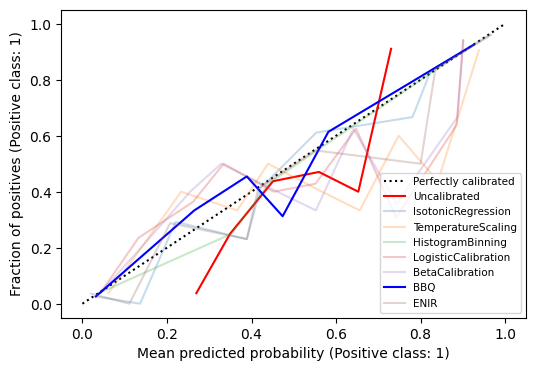

In [434]:
calib_utils.calibration_curves(iso_code, config, highlight=calibrator_name, n_bins=10)

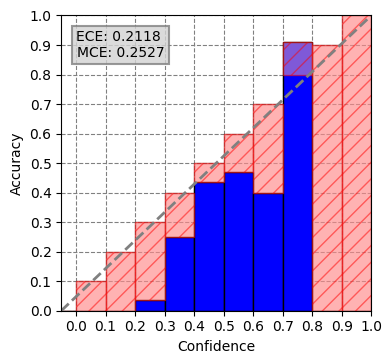

In [430]:
output = calib_utils.get_calibrator_outputs(iso_code, config, calibrator_name, phase="test")
calib_utils.reliability_diagram(output["y_probs"], output["y_true"], n_bins=10)

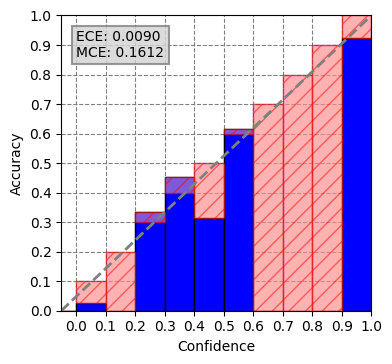

In [431]:
calib_utils.reliability_diagram(output["y_probs_cal"], output["y_true"], n_bins=10)